# Introduction to sci-kit learn

This notebook demonstrates some of the most usefulfuctions of the Sci-kit learn library.

1. Sci-kit learn workflow
2. Getting the data ready
3. Choose the right algorithm/ estimator for our problem
4. Fir the model/ algorithm and use it to make predictions on our data
5. Evaluating a model
6. Improve the model
7. Save and load a trained model
8. Group it all together

## 1. End to End scikit learn model workflow

In [1]:
# 1. Get the data ready
import pandas as pd
import numpy as np
heart_diseases = pd.read_csv('heart_disease.csv')
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
# create x (features matrix)
x = heart_diseases.drop('target', axis = 1)

# create y (lables)
y = heart_diseases['target']

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.2 (default, Mar 26 2020, 15:53:00)  [GCC 7.3.0]
executable: /home/skk_thenotorious/Documents/Udemy-MachineLearning/Sample_Project/env/bin/python
   machine: Linux-5.0.0-37-generic-x86_64-with-glibc2.10

Python dependencies:
       pip: 20.0.2
setuptools: 46.1.3.post20200330
   sklearn: 0.22.1
     numpy: 1.18.1
     scipy: 1.4.1
    Cython: None
    pandas: 1.0.3
matplotlib: 3.1.3
    joblib: 0.14.1

Built with OpenMP: True


In [5]:
# 2. Choose the right model and hyperparameters

#our problem is classification model probelem. Here we are trying to figure it out whether 
#the patient has heart deseases or not

from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier is a clafification model
clf = RandomForestClassifier(n_estimators=100)

# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [6]:
# 3. Fit the model to the training data 
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
# 80% of the data will be used for train the data.

In [7]:
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [8]:
# make a prediction
y_label = clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [9]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
22,42,1,0,140,226,0,1,178,0,0.0,2,0,2
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,51,0,0,130,305,0,1,142,1,1.2,1,0,3
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2
219,48,1,0,130,256,1,0,150,1,0.0,2,2,3
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3


In [10]:
y_preds = clf.predict(x_test)
y_preds

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

In [11]:
y_test

22     1
106    1
184    0
159    1
290    0
      ..
190    0
46     1
219    0
245    0
128    1
Name: target, Length: 61, dtype: int64

In [12]:
# 4. Evaluate the model on the training data and test data
clf.score(x_train, y_train)

1.0

In [13]:
clf.score(x_test, y_test)

0.8524590163934426

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84        31
           1       0.80      0.93      0.86        30

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [15]:
confusion_matrix(y_test, y_preds)

array([[24,  7],
       [ 2, 28]])

In [16]:
accuracy_score(y_test, y_preds)

0.8524590163934426

In [17]:
# 6. Improve model
# Try different amount of n_estimators
np.random.seed(42)

for i in range(10,100,10):
    print(f"trying model with {i} estimators")
    clf = RandomForestClassifier(n_estimators=i).fit(x_train, y_train)
    print(f"Model accuracy on test set: {clf.score(x_test, y_test) * 100:.2f}%" )
    print("")

trying model with 10 estimators
Model accuracy on test set: 78.69%

trying model with 20 estimators
Model accuracy on test set: 86.89%

trying model with 30 estimators
Model accuracy on test set: 83.61%

trying model with 40 estimators
Model accuracy on test set: 83.61%

trying model with 50 estimators
Model accuracy on test set: 88.52%

trying model with 60 estimators
Model accuracy on test set: 83.61%

trying model with 70 estimators
Model accuracy on test set: 85.25%

trying model with 80 estimators
Model accuracy on test set: 83.61%

trying model with 90 estimators
Model accuracy on test set: 85.25%



In [18]:
# 7. Save a model and load it
import pickle

pickle.dump(clf, open('random_forest_model_1.pkl', 'wb')) # wb - write binary

In [19]:
loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(x_test, y_test)

0.8524590163934426

## 1. Getting our data ready to be used with Machin Learning

Three main things we have to do.

1. Split the data into features and labels (Usually x and y)
2. Filling (also called inputing) or disregarding missing values
3. Conveting non-numerical values into numerical values (also called feature encoding)

In [20]:
heart_diseases.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
x = heart_diseases.drop('target', axis = 1)
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
y = heart_diseases['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [24]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((242, 13), (61, 13), (242,), (61,))

In [25]:
x.shape

(303, 13)

In [26]:
len(heart_diseases)

303

# 1.1 Make sure its all Numerical

In [27]:
car_sales = pd.read_csv('car-sales-data.csv')

In [28]:
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [29]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [30]:
# Split into X and Y
x = car_sales.drop('Price', axis = 1)
y = car_sales['Price']

# Split into train and test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [31]:
# Build ML model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [32]:
# Turn the categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
#print(transformed_x)
transformed_x

<1000x14 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [33]:
pd.DataFrame(transformed_x)

,0
0,"(0, 1)\t1.0\n (0, 8)\t1.0\n (0, 11)\t1.0\n..."
1,"(0, 0)\t1.0\n (0, 5)\t1.0\n (0, 12)\t1.0\n..."
2,"(0, 1)\t1.0\n (0, 8)\t1.0\n (0, 11)\t1.0\n..."
3,"(0, 3)\t1.0\n (0, 8)\t1.0\n (0, 11)\t1.0\n..."
4,"(0, 2)\t1.0\n (0, 5)\t1.0\n (0, 10)\t1.0\n..."
...,...
995,"(0, 3)\t1.0\n (0, 4)\t1.0\n (0, 11)\t1.0\n..."
996,"(0, 3)\t1.0\n (0, 8)\t1.0\n (0, 10)\t1.0\n..."
997,"(0, 2)\t1.0\n (0, 5)\t1.0\n (0, 11)\t1.0\n..."
998,"(0, 1)\t1.0\n (0, 8)\t1.0\n (0, 11)\t1.0\n..."


In [34]:
dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,0,1,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [35]:
# Let's refit the model
np.random.seed(42)
x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)

model.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [36]:
x.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [37]:
model.score(x_test, y_test)

0.23599839361113176

## 1.2 What if there is a missing values

1. Fill them with some values
2. Remove the sample with missing data altogether

In [38]:
# import car sales missing data
car_sales_missing = pd.read_csv('export_car_data_sale_file.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [39]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [40]:
# create x and y
x = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [41]:
# Lets covert into Numbers
# Turn the categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(x)
#print(transformed_x)
transformed_x

ValueError: Input contains NaN

### 1. Fill missing data with Pandas

In [42]:
# Fill the Make Column
car_sales_missing['Make'].fillna('missing', inplace=True)

#Fill the Colour Column
car_sales_missing['Colour'].fillna('missing', inplace=True)

#Fill the Odometer column
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(), inplace=True)

#Fill the Doors Columns
car_sales_missing['Doors'].fillna(4, inplace=True)

In [43]:
# Check the dataframe again
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [44]:
# Remove rows with missing price value
car_sales_missing.dropna(inplace=True)

In [45]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [46]:
len(car_sales_missing)

950

In [47]:
x = car_sales_missing.drop('Price', axis = 1)
y = car_sales_missing['Price']

In [48]:
# Turn the categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_missing)
#print(transformed_x)
transformed_x

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

### 2. Fill missing values with sci-kit learn

In [49]:
car_missing_data = pd.read_csv('export_car_data_sale_file.csv')
car_missing_data.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [50]:
car_missing_data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [51]:
# Drop the rows with no labels
car_missing_data.dropna(subset = ['Price'], inplace=True)
car_missing_data.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [52]:
# Split in X and Y
x = car_missing_data.drop('Price', axis = 1)
y = car_missing_data['Price']

In [53]:
x

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431.0,4.0
1,BMW,Blue,192714.0,5.0
2,Honda,White,84714.0,4.0
3,Toyota,White,154365.0,4.0
4,Nissan,Blue,181577.0,3.0
...,...,...,...,...
995,Toyota,Black,35820.0,4.0
996,NaN,White,155144.0,3.0
997,Nissan,Blue,66604.0,4.0
998,Honda,White,215883.0,4.0


In [54]:
# Fill Missing values with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical with missing and numerical with mean value
cat_imputer = SimpleImputer(strategy = 'constant', fill_value = 'missing')
door_imputer = SimpleImputer(strategy = 'constant', fill_value = 4)
num_imputer = SimpleImputer(strategy = 'mean')


# Define Columns
cat_features = ['Make', 'Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

# Create  an imputer (something that fills missing data)
imputer = ColumnTransformer([
            ('cat_imputer', cat_imputer, cat_features),
            ('door_imputer', door_imputer, door_features),
            ('num_imputer', num_imputer, num_features)
])

# Transform the data
filled_x = imputer.fit_transform(x)
filled_x

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [55]:
car_sales_filled = pd.DataFrame(filled_x,
                                columns = ['Make', 'Colour', 'Doors', 'Odometer (KM)'])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [56]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [57]:
# Lets covert into Numbers
# Turn the categories into Numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features)],
                                   remainder = "passthrough")

transformed_x = transformer.fit_transform(car_sales_filled)
#print(transformed_x)
transformed_x

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [58]:
# Now we have got our data as numbers and filled (no missing values)
# Lets fit a model

np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(transformed_x, y, test_size = 0.2)
model = RandomForestRegressor()
model.fit(x_train, y_train)
model.score(x_test, y_test)

0.21990196728583944

In [59]:
len(car_sales_filled), len(car_sales)

(950, 1000)

## 2. Choosing the right estimator/ algorithm for our problem

Scikit-learn uses estimator as another term for machine learning model or algorithm

* Classsification - predicting whether a sample is one or another - heart disease
* Regression - Predicting a number - car sale


Step 1 - Check the Scikit-Learn Machine Learning map
https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html



### 2.1 Picking the machine learning model for regression problem

In [60]:
# import Boston housing data set

from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [61]:
boston_df = pd.DataFrame(boston['data'], columns = boston['feature_names'])
boston_df['target']  = pd.Series(boston['target'])
boston_df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [62]:
# Howmany Samples?
len(boston_df)

506

In [63]:
# Lets try the Ridge Regression Model
from sklearn.linear_model import Ridge

# Setup Random Seed
np.random.seed(42)

# Create the data
x = boston_df.drop('target', axis = 1)
y = boston_df['target']

# Split data into test and train dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate Ridge Model
model = Ridge()
model.fit(x_train, y_train)

# Check the score of the Ridge model on the test data
model.score(x_test, y_test)

0.6662221670168522

How to improve the score?

What if Ridge model is not wroking?

Let's refer back to the map https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [64]:
# Lets try Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor

#Setup Random seed
np.random.seed(42)

#create data set
x = boston_df.drop('target', axis = 1)
y = boston_df['target']

# split the data into train and test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# initate Regressor Model
rf = RandomForestRegressor(n_estimators=100)
rf.fit(x_train, y_train)


#Score the test data
rf.score(x_test, y_test)

0.873969014117403

# 2.2 Choosing the estimator for classification Problem

Let's go to the map ... https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [65]:
heart_disease = pd.read_csv('heart_disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Cosulting the map and it says LinearSVC

In [66]:
# Import the LinearSVC estimator class
from sklearn.svm import LinearSVC

#Set up random Seed
np.random.seed(42)

# Make the data
x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split the data into Train and Test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Instantiate LinearSVC
clf = LinearSVC(max_iter=1000)
clf.fit(x_train, y_train)

# Score/ Evaluate the model
clf.score(x_test, y_test)

0.8688524590163934

In [67]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [68]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Set up random Seed
np.random.seed(42)

# Make the data
x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split the data into Train and Test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Score/ Evaluate the model
clf.score(x_test, y_test)

0.8524590163934426

## 3. Fit the model /algorithm on our data and use it to make predictions

### 3.1 Fitting the model to the data

Different names for:
* X = features, features variable, data
* Y = labels, targets, target variables

In [69]:
# Import the RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

#Set up random Seed
np.random.seed(42)

# Make the data
x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

# Split the data into Train and Test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Instantiate RandomForestClassifier
clf = RandomForestClassifier()

# Fit the model to the data
clf.fit(x_train, y_train)

# Score/ Evaluate the model
clf.score(x_test, y_test)

0.8524590163934426

In [70]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [71]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

## 3.2 Make predictions using a machine learning model

2 ways to make predictions
1. predict()
2. predict_proba()

In [72]:
# Use a trained model to make predictions
clf.predict(np.array([1,3,4,6,8,9]))

ValueError: Expected 2D array, got 1D array instead:
array=[1. 3. 4. 6. 8. 9.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [73]:
clf.predict(x_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [74]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [75]:
# Compare predictions to truth labels to evaluate the model

y_preds = clf.predict(x_test)
np.mean(y_preds == y_test)

0.8524590163934426

In [76]:
clf.score(x_test, y_test)

0.8524590163934426

In [77]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.8524590163934426

# Make prediction with `predict_proba()`

In [78]:
# Make prediction with predict_proba() function
clf.predict_proba(x_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

predict() can also be used for regression models

In [79]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

#create the data
x = boston_df.drop('target', axis = 1)
y = boston_df['target']

# Split into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

# Instantiate and fit model
model = RandomForestRegressor()
model.fit(x_train, y_train)

# Make Predictions
y_preds = model.predict(x_test)

In [80]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [81]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [82]:
# Compare the prediction to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.1226372549019623

## 4. Evaluating Machine Learning Model

Three ways to evaluate the Sci-kit Learn models/ estimators:
1. Estimator `score` method
2. The `scoring` parameter
3. Problem-specific metric functions

### 4.1 Evaluate method with score method

In [83]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
clf.score(x_test, y_test)

0.8524590163934426

In [85]:
# Lets do the same for regressor

from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis = 1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestRegressor()
clf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [86]:
clf.score(x_test, y_test)

0.873969014117403

### 4.2 Evaluating a model using the Scoring parameter

In [87]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
clf.score(x_test, y_test)

0.8524590163934426

In [89]:
cross_val_score(clf, x, y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [90]:
cross_val_score(clf, x, y, cv = 10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [91]:
np.random.seed(42)

# Single training and test split score
clf_single_score = clf.score(x_test, y_test)

# Take a mean of the cross split val score
clf_cross_score = np.mean(cross_val_score(clf, x, y))

# Compare the score
clf_single_score, clf_cross_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification model evaluation Metrics

1. Accuracy
2. Area under ROC curve
3. Confusion Matrix
4. Classificaion Report

1. Accuracy

In [92]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

#x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, x, y)

In [93]:
np.mean(cross_val_score)

0.8248087431693989

In [94]:
print(f"Heart Disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart Disease Classifier Cross-Validated Accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve (AUC)
* ROC curve

ROC curves are the comparision of a model's true postive rate (tpr) and false postive rate (fpr)

* True Positive = Model predicts 1 when truth is 1
* False Positive = Model predicts 1 when truth is 0
* True Negative = Model predicts 0 when truth is 0
* False Negative = Model predicts 0 when truth is 1


In [95]:
# create test and train data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [96]:
from sklearn.metrics import roc_curve

# Fit the classifier
clf.fit(x_train, y_train)

# Make predictions with probabilities
y_probs = clf.predict_proba(x_test)

y_probs[:10], len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [97]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [98]:
# Calculate the fpt, tpr, and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

#check the false positive

fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

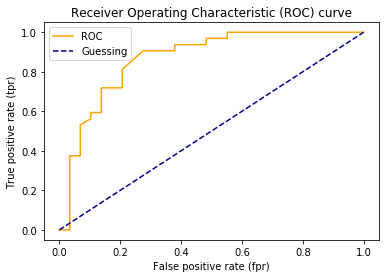

In [99]:
# create a function for ploting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr)
    and true positive rate (tpr) of a model.
    """
    
    # Plot ROC Curve
    plt.plot(fpr, tpr, color="orange", label ='ROC')
    
    # Plot line with no predictive power (baseline)
    plt.plot([0, 1], [0,1], color = "darkblue", linestyle ='--', label = 'Guessing')
    
    #Customize the plot
    plt.xlabel('False positive rate (fpr)')
    plt.ylabel('True positive rate (tpr)')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [100]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.8669181034482759

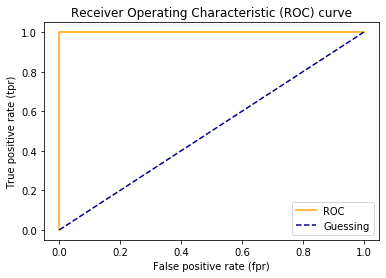

In [101]:
# Plot perfect ROC curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [102]:
# Perfect AUC score

roc_auc_score (y_test, y_test)

1.0

**Confusion Matrix**

Confusion matrix is qucik way to compare the labels a model predicts and the actual labels it was supposed to be predict.

In essence, giving you an idea of where the model is getting confused.

In [103]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(x_test)
confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [104]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(y_test,
            y_preds,
            rownames = ['Actual Labels'],
            colnames = ['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


### Install seabon in jupyter notebook

In [114]:
import sys
!conda install --yes --prefix {sys.prefix} seaborn 

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.6.11
  latest version: 4.8.3

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



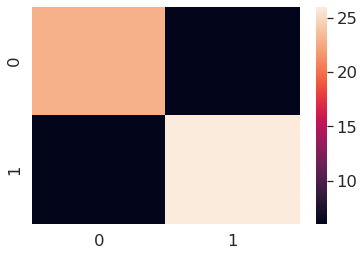

In [105]:
# Make our confusion matrix more visual with seaborn's heatmap()

import seaborn as sns

# Set the font scale
sns.set(font_scale=1.5)

# Create a confusion matrix 
conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat)

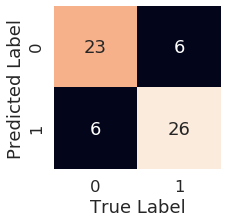

In [106]:
def plot_conf_map(conf_mat):
    """
    Plot a confusion matrix with seaborn heatmap
    """
    
    fig, ax = plt.subplots(figsize = (3,3))
    ax = sns.heatmap(conf_mat,
                     annot = True, #Annotate the boxes with conf_mat info
                     cbar = False)
    plt.xlabel('True Label')
    plt.ylabel('Predicted Label')
    
    # Fix the broekn label annotation if any
    #bottom, top = ax.get_ylim()
    #ax.set_ylim(bottom + 0.5, top - 0.5)

plot_conf_map(conf_mat)
    

**Classification Report**

In [107]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [108]:
# Where precision and prediction become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1

disease_pred = np.zeros(10000)

pd.DataFrame(classification_report(disease_true,
                                   disease_pred,
                                   output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


 ### 4.2.2 Regression Model evaluation Matrics
 
 Model evaluation matrics documentation
 
 https://scikit-learn.org/0.15/modules/model_evaluation.html
 
 1. R^2 (pronounces r squared) or coefficient of determination
 2. Mean Absolute Error (MAE)
 3. Mean squared Error (MSE)

In [109]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

x = boston_df.drop('target', axis = 1)
y = boston_df['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

model = RandomForestRegressor()
model.fit(x_train, y_train);

In [110]:
model.score(x_test, y_test)

0.873969014117403

In [111]:
from sklearn.metrics import r2_score 

# Fill an array with y_test mean

y_test_mean = np.full(len(y_test), y_test.mean())

y_test.mean()

21.488235294117644

In [112]:
r2_score(y_test, y_test_mean)

0.0

In [113]:
r2_score(y_test, y_test)

1.0

**Mean Absolute Error**

MAE is the average of the absolute differences between predicted and actual value. It gives you an idea of how wrong your model predictions are.

In [114]:
# Mean Absolute Error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(x_test)
mae = mean_absolute_error(y_test, y_preds)
mae

2.1226372549019623

In [115]:
df = pd.DataFrame(data = {'actual values': y_test,
                          'predicted values' : y_preds})

df['differences'] = df['predicted values'] - df['actual values']
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


**Mean squared error**

In [116]:
# mean squared erro

from sklearn.metrics import mean_squared_error

y_preds = model.predict(x_test)
mse = mean_squared_error(y_test, y_preds)
mse

9.242328990196082

In [117]:
# caalculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

9.242328990196082

## 4.2.3 Finaly using the scoring parameter

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

x = heart_disease.drop('target', axis = 1)
y = heart_disease['target']

clf = RandomForestClassifier()

In [119]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, scoring = None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [120]:
# cross validation accuracy
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [121]:
np.random.seed(42)
cv_acc = cross_val_score(clf, x, y, scoring = 'accuracy')
print(f'The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%')

The cross-validated accuracy is: 82.48%


In [122]:
# Precision

cv_precision = cross_val_score(clf, x, y, scoring = 'precision')
np.mean(cv_precision)

0.8085601538512754

In [123]:
#Recall

cv_reacll = cross_val_score(clf, x, y, scoring = 'recall')
np.mean(cv_reacll)

0.8424242424242424

**Scoring parameter for RegressionModel**

In [124]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

x = boston_df.drop('target', axis = 1)
y = boston_df['target']

clf = RandomForestRegressor()

In [125]:
np.random.seed(42)
cv_r2 = cross_val_score(clf, x, y, scoring=None)
np.mean(cv_r2)

0.622375083951403

In [126]:
np.random.seed(42)
cv_r2 = cross_val_score(clf, x, y, scoring='r2')
cv_r2

array([0.76861165, 0.85851765, 0.74941131, 0.47891315, 0.25642166])

In [127]:
# Mean absolute erro
cv_mae = cross_val_score(clf, x, y, scoring='neg_mean_absolute_error')
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

### 4.3 Using different evaluation metrics  as Scikit-Learn functions

**Classification evaluation functions**

In [128]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


np.random.seed(42)

x = heart_diseases.drop('target', axis=1)
y = heart_diseases['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make some predictions
y_predict = clf.predict(x_test)

#Evaluate the Classifier
print('Classifier Metrics on the Test Set')
print(f'Accuracy: {accuracy_score(y_test, y_predict)*100: .2f}%')
print(f'Precision: {precision_score(y_test, y_predict)}')
print(f'Recall: {recall_score(y_test, y_predict)}')
print(f'F1: {f1_score(y_test, y_predict)}')


Classifier Metrics on the Test Set
Accuracy:  85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


**Regression Evaluation Functions**

In [129]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


np.random.seed(42)

x = heart_diseases.drop('target', axis=1)
y = heart_diseases['target']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make some predictions
y_predict = clf.predict(x_test)

#Evaluate the Classifier
print('Classifier Metrics on the Test Set')
print(f'MAE: {mean_absolute_error(y_test, y_predict)}')
print(f'MSE: {mean_squared_error(y_test, y_predict)}')
print(f'R2: {r2_score(y_test, y_predict)}')

Classifier Metrics on the Test Set
MAE: 0.14754098360655737
MSE: 0.14754098360655737
R2: 0.40840517241379315


## 5. Improving a model

First prediction = baseline predictions
First model = baseline model


From a data prespective
* Could we collect more data? (generally, the more data, the better)
* could we improve our data? 

From a model prespective
* Is there a better model we could use?
* could we improve the current model

Hyperparameters vs Parameters
* Parameters = model find these pattern in data
* HyperParameters = settings on a model you can adjust to (potentially) improve its ability to find patterns

Three ways to adjust Hyperparameters:
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustively with GridSearchCV

In [130]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier

In [131]:
clf.get_params(clf)

{'bootstrap': None,
 'ccp_alpha': None,
 'class_weight': None,
 'criterion': None,
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': None,
 'min_impurity_split': None,
 'min_samples_leaf': None,
 'min_samples_split': None,
 'min_weight_fraction_leaf': None,
 'n_estimators': None,
 'n_jobs': None,
 'oob_score': None,
 'random_state': None,
 'verbose': None,
 'warm_start': None}

### 5.1 Tuning Hyperparameters by Hand

Let's make 3 sets, training, validation and Test.

In [132]:
clf.get_params(clf)

{'bootstrap': None,
 'ccp_alpha': None,
 'class_weight': None,
 'criterion': None,
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': None,
 'min_impurity_split': None,
 'min_samples_leaf': None,
 'min_samples_split': None,
 'min_weight_fraction_leaf': None,
 'n_estimators': None,
 'n_jobs': None,
 'oob_score': None,
 'random_state': None,
 'verbose': None,
 'warm_start': None}

We're going to try and adjust:

* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [140]:
def evaluate_preds(y_true, y_preds):
    '''
    Perform evaluation on comparision on y_true labels vs y_pred labels
    on a classification
    '''
    accuracy = accuracy_score(y_true,  y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {'accuracy': round(accuracy, 2),
                   'precision': round(precision, 2),
                   'recall': round(recall, 2),
                   'f1_score': round(f1, 2)}
    print(f'Accuracy: {accuracy * 100:.2f}%')
    print(f'Precision: {precision * 100:.2f}%')
    print(f'Recall: {recall * 100:.2f}%')
    print(f'F1 Score: {f1 * 100:.2f}%')
    
    return metric_dict

In [141]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

#Shuffle data

heart_disease_shuffled = heart_disease.sample(frac=1)

# Split into X and Y
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

#Split the data into train, test and validate 
train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled))
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)

clf = RandomForestClassifier()
clf.fit(x_train, y_train)

# Make baseline predictions
y_preds = clf.predict(x_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 Score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1_score': 0.85}

In [143]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(x_train, y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(x_valid)


#Evaluate the 2nd Classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)
clf_2_metrics

Accuracy: 82.22%
Precision: 84.00%
Recall: 84.00%
F1 Score: 84.00%


{'accuracy': 0.82, 'precision': 0.84, 'recall': 0.84, 'f1_score': 0.84}

In [145]:
np.random.seed(42)

# Create a second classifier with different hyperparameters
clf_3 = RandomForestClassifier(n_estimators=100, max_depth=10)
clf_3.fit(x_train, y_train)

# Make predictions with different hyperparameters
y_preds_3 = clf_3.predict(x_valid)


#Evaluate the 2nd Classifier
clf_3_metrics = evaluate_preds(y_valid, y_preds_3)
clf_3_metrics

Accuracy: 80.00%
Precision: 80.77%
Recall: 84.00%
F1 Score: 82.35%


{'accuracy': 0.8, 'precision': 0.81, 'recall': 0.84, 'f1_score': 0.82}

### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [146]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
        'max_depth': [None, 5, 10, 20, 30],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

np.random.seed(42)

# Split inton X & Y
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2)

# Instantiate RandomeForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions = grid,
                            n_iter = 10, # number of models to try
                            cv = 5, 
                            verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.5s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.3s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.7s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   24.7s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [147]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [148]:
# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(x_test)

#Evaludate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)
rs_metrics

Accuracy: 81.97%
Precision: 77.42%
Recall: 85.71%
F1 Score: 81.36%


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.86, 'f1_score': 0.81}

### 5.3 Hyperparameter tuning with GridSearchCV


In [149]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [150]:
grid_2 = {'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}


In [153]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split inton X & Y
x = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# Split into train and test data sets
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size = 0.2)

# Instantiate RandomeForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup GridSearchCV
gs_clf = GridSearchCV(estimator = clf,
                            param_grid = grid_2,
                            cv = 5, 
                            verbose = 2)

# Fit the GrisSearchCV version of clf
gs_clf.fit(x_train, y_train)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.8s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.7s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   24.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [154]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [155]:
# Make predictions with the best hyperparameters
gs_y_preds = gs_clf.predict(x_test)

#Evaludate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)
gs_metrics

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 Score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1_score': 0.78}

Let's compare the different models metrics

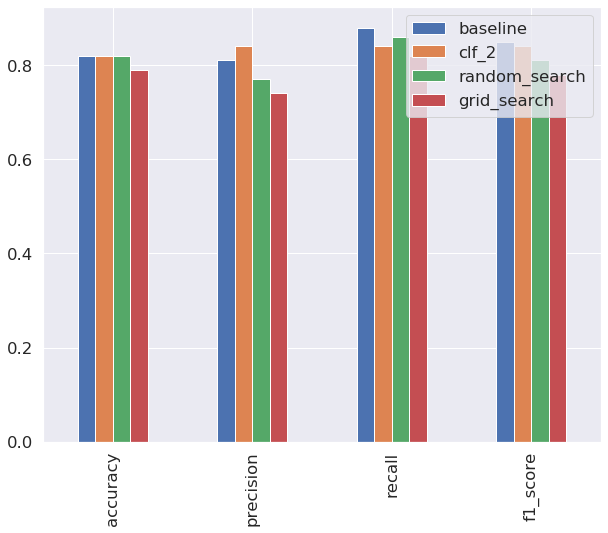

In [156]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'clf_2': clf_2_metrics,
                                'random_search': rs_metrics,
                                'grid_search': gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

### 6. Saving and loading Trained machine learning models

Two ways to save and load machine learning models:
1. With python's pickle module
2. With the joblib module

**Pickle**

In [157]:
import pickle

# Save an existing model to File
pickle.dump(gs_clf, open('gs_random_forest_model_1.pkl', 'wb'))

In [158]:
# Load saved model

loaded_pickle_model = pickle.load(open('gs_random_forest_model_1.pkl', 'rb'))

In [160]:
# Make some predictions
pickle_y_preds = loaded_pickle_model.predict(x_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 Score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1_score': 0.78}

**Joblib**

In [161]:
from joblib import dump, load

#Save model to file
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [162]:
# Import a saved joblib model
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [163]:
# Make and evaluate joblib predictions
joblib_y_preds = loaded_joblib_model.predict(x_test)
evaluate_preds(y_test, joblib_y_preds)

Accuracy: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 Score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1_score': 0.78}

# 7. Putting all together

In [171]:
data = pd.read_csv('car-sales-extended-missing-data.csv')
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [172]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [173]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

Steps we have to do

1. Fill missing data
2. Convert data to Numbers
3. Build model on the data

In [180]:
# getting data ready 
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV

# Setup random seef
np.random.seed(42)

# Import data and drop rows with missing values
data = pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset = ['Price'], inplace=True)

# Define different features and transformer pipeline
categorical_features = ['Make', 'Colour']
categorical_transformer = Pipeline(steps = [
                           ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
                           ('onehot', OneHotEncoder(handle_unknown='ignore'))])

door_features = ['Doors']
door_transformer = Pipeline(steps = [
                    ('imputer', SimpleImputer(strategy='constant', fill_value=4))])

numeric_features = ['Odometer (KM)']
numeric_transformer = Pipeline(steps = [
                       ('imputer', SimpleImputer(strategy='mean'))])

# Setup preprocessing steps (fill missing values, then convert to numbers)
preprocessor = ColumnTransformer(
                    transformers= [
                        ('cat', categorical_transformer, categorical_features),
                        ('door', door_transformer, door_features),
                        ('num', numeric_transformer, numeric_features)])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('model', RandomForestRegressor())])

# Split data
x = data.drop('Price', axis = 1)
y = data['Price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

#Fit and score the model
model.fit(x_train, y_train)
model.score(x_test, y_test)


0.22188417408787875

It's also possible to use GridSearchCV or RandomizedSearchCV with our pipeline 

In [181]:
# Use GridSearchCV with our regression pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
        'preprocessor__num__imputer__strategy': ['mean', 'median'],
        'model__n_estimators': [100, 1000],
        'model__max_depth': [None, 5],
        'model__max_features': ['auto'],
        'model__min_samples_split': [2, 4]
}

gs_model = GridSearchCV(model, pipe_grid, cv = 5, verbose= 2)
gs_model.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s



[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=aut

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.6s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, mod

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [182]:
gs_model.score(x_test, y_test)

0.3339554263158365